In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
GME= pd.read_csv("/content/gdrive/MyDrive/DS 340W/Final Research Paper/Datasets/GME_5Y.csv")
GME = GME.dropna()
GME = GME[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
GME.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-23,24.150000,24.440001,23.799999,23.959999,19.785828,4662200
1,2017-03-24,21.370001,21.559999,20.660000,20.700001,17.093767,15944600
2,2017-03-27,20.330000,21.090000,20.240000,20.850000,17.217636,6962300
3,2017-03-28,20.879999,21.780001,20.730000,21.719999,17.936069,4278600
4,2017-03-29,21.780001,22.139999,21.570000,21.950001,18.126001,3258300


In [ ]:
GME.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,48.303741,50.922025,45.706203,48.008880,47.228507,6.708667e+06
std,70.320344,75.108572,65.584204,69.486183,69.823016,1.418025e+07
min,2.850000,2.940000,2.570000,2.800000,2.800000,8.182000e+05
25%,6.650000,6.975000,6.320000,6.680000,6.680000,2.258350e+06
50%,15.190000,15.460000,14.880000,15.220000,13.972719,3.397300e+06
75%,23.635000,24.005000,23.204999,23.635000,19.806473,5.689150e+06
max,379.709991,483.000000,291.510010,347.510010,347.510010,1.971579e+08


In [ ]:
GME.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.7+ KB


In [ ]:
pip install chart_studio

     |████████████████████████████████| 64 kB 3.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=526059351409ccba09d2ffdc9c30c602a39ade833986edefbf349c75f644ac8c
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
layout = go.Layout(
    title='STOCK PRICE OF GME',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
GME_DATA = [{'x':GME['Date'], 'y':GME['Close']}]
plot = go.Figure(data=GME_DATA, layout=layout)

In [ ]:
iplot(plot)

In [ ]:
GME['Open-Close']= GME.Close - GME.Open
GME['High-Low']  = GME.High - GME.Low
GME = GME.dropna()
X= GME[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,-0.190001,0.640002
1,-0.670000,0.899999
2,0.520000,0.850000
3,0.840000,1.050001
4,0.170000,0.569999


In [ ]:
Y= np.where(GME['Close'].shift(-1)>GME['Close'],1,-1)

In [ ]:

split_percentage = 0.8
split = int(split_percentage*len(GME))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, Y, cv=10))

In [ ]:
print(scores[0])

[0.50793651 0.3968254  0.42857143 0.42063492 0.53968254 0.47619048
 0.55555556 0.46031746 0.52380952 0.512     ]


In [ ]:
print(scores[1])

[0.51587302 0.41269841 0.55555556 0.53174603 0.52380952 0.6031746
 0.52380952 0.45238095 0.53174603 0.408     ]


In [ ]:
rfc = RandomForestClassifier(n_estimators=16)

In [ ]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.55      0.66      0.60       136
           1       0.48      0.36      0.41       116

    accuracy                           0.52       252
   macro avg       0.51      0.51      0.51       252
weighted avg       0.52      0.52      0.51       252



In [ ]:
print(confusion_matrix(Y_test, rfc_pred))

[[90 46]
 [74 42]]


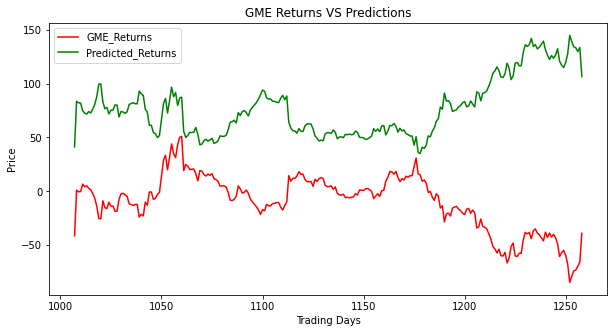

In [ ]:
GME['Predicted_Signal'] = rfc.predict(X)

GME['GME_returns'] = np.log(GME['Close']/GME['Close'].shift(1))
Cumulative_SPY_returns = GME[split:]['GME_returns'].cumsum()*100
 
GME['Strategy_returns'] = GME['GME_returns']* GME['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = GME[split:]['Strategy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'GME_Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Predicted_Returns')
plt.legend()
plt.title("GME Returns VS Predictions")
plt.xlabel("Trading Days")
plt.ylabel("Price")
plt.show()

In [ ]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 3.26


In [ ]:
model = rfc.fit(X_train, Y_train)
model = rfc.fit (X_train,Y_train)

In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.375  0.625 ]
 [0.     1.    ]
 [0.1875 0.8125]
 [0.3125 0.6875]
 [0.0625 0.9375]
 [0.8125 0.1875]
 [0.6875 0.3125]
 [0.3125 0.6875]
 [0.6875 0.3125]
 [0.375  0.625 ]
 [0.875  0.125 ]
 [1.     0.    ]
 [0.9375 0.0625]
 [0.625  0.375 ]
 [0.1875 0.8125]
 [0.375  0.625 ]
 [0.6875 0.3125]
 [0.875  0.125 ]
 [0.3125 0.6875]
 [0.4375 0.5625]
 [0.8125 0.1875]
 [0.8125 0.1875]
 [0.0625 0.9375]
 [0.375  0.625 ]
 [0.125  0.875 ]
 [0.6875 0.3125]
 [0.8125 0.1875]
 [0.875  0.125 ]
 [0.6875 0.3125]
 [0.625  0.375 ]
 [0.5625 0.4375]
 [0.625  0.375 ]
 [0.875  0.125 ]
 [0.1875 0.8125]
 [0.6875 0.3125]
 [0.125  0.875 ]
 [0.625  0.375 ]
 [0.0625 0.9375]
 [0.0625 0.9375]
 [0.625  0.375 ]
 [0.625  0.375 ]
 [0.5625 0.4375]
 [0.1875 0.8125]
 [0.1875 0.8125]
 [0.125  0.875 ]
 [0.1875 0.8125]
 [0.375  0.625 ]
 [0.1875 0.8125]
 [0.     1.    ]
 [0.875  0.125 ]
 [0.9375 0.0625]
 [0.125  0.875 ]
 [0.125  0.875 ]
 [0.5    0.5   ]
 [0.8125 0.1875]
 [0.375  0.625 ]
 [0.9375 0.0625]
 [0.75   0.25  ]
 [0.0625 0.937

In [ ]:
predicted = rfc.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.confusion_matrix(Y_test, predicted))

[[82 54]
 [63 53]]


In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.57      0.60      0.58       136
           1       0.50      0.46      0.48       116

    accuracy                           0.54       252
   macro avg       0.53      0.53      0.53       252
weighted avg       0.53      0.54      0.53       252



In [ ]:
#print(model.score(X_train,Y_train))

In [ ]:
print(model.score(X_test,Y_test))

0.5357142857142857
